### Result visualization
Plot train/test loss/acc of different training with several optimizer

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pickle
import io

class CPU_Unpickler(pickle.Unpickler):
    def find_class(self, module, name):
        if module == 'torch.storage' and name == '_load_from_bytes':
            return lambda b: torch.load(io.BytesIO(b), map_location='cpu')
        else:
            return super().find_class(module, name)

In [3]:
# Run this cell only if you run this notebook on Google Colab.
import sys
from google.colab import drive
drive.mount('/content/drive')

sys.path.append('/content/drive/My Drive/Project_opti_ML') # for Arthur
#sys.path.append('/content/drive/MyDrive/Colab_Notebooks/OptiML/OptiForML2022') # for Louis

ModuleNotFoundError: No module named 'google.colab'

In [4]:
%cd '/content/drive/My Drive/Project_opti_ML/OptiForML2022'

!git checkout main
!git pull

/content/drive/My Drive/Project_opti_ML/OptiForML2022
D	fig/CIFAR_training.png
D	fig/CIFAR_training_metric.png
D	output/training_history/log-padam_sgd_200epochs_multilr_cifar (1).pickle
D	output/training_history/log-padam_sgd_dyn_200epochs_multilr_cifar (1).pickle
M	result_visualization.ipynb
Already on 'main'
Your branch is up to date with 'origin/main'.
Already up to date.


In [4]:
import os
import pickle
import torch
import matplotlib.pyplot as plt
from path import TRAIN_HISTORY_DIR, FIGURE_DIR

In [5]:
from warnings import filters
filenames = os.listdir(TRAIN_HISTORY_DIR)
filenames

['adam_350epochs_cifar_lr0.001_weightdecay0.0005_batch256_momNone.pickle',
 'atmo_350epochs_cifar_lr0.01_weightdecay0.0005_batch256_mom0.95.pickle',
 'dynamicAtmo_350epochs_cifar_lr0.001_weightdecay0.0005_batch256_mom0.95_cos.pickle',
 'log-adaHessian_multiSteplr_160epochs_cifar.pickle',
 'log-adaSGD_multiSteplr_200epochs_cifar_batch_256.pickle',
 'log-padam_sgd_200epochs_multilr_cifar.pickle',
 'log-padam_sgd_dyn_200epochs_multilr_cifar.pickle',
 'sgd_350epochs_cifar_lr0.01_weightdecay0.0005_batch256_mom0.95.pickle']

In [ ]:
#To select certain files only
names =[]
names.append(filenames[0])
names.append(filenames[1])
names.append(filenames[3])
names.append(filenames[4])
names.append(filenames[5])
names.append(filenames[7])
filenames = names
filenames

['sgd_350epochs_cifar_lr0.01_weightdecay0.0005_batch256_mom0.95.pickle',
 'atmo_350epochs_cifar_lr0.01_weightdecay0.0005_batch256_mom0.95.pickle',
 'dynamicAtmo_350epochs_cifar_lr0.001_weightdecay0.0005_batch256_mom0.95_cos.pickle',
 'log-adaSGD_multiSteplr_200epochs_cifar_batch_256.pickle']

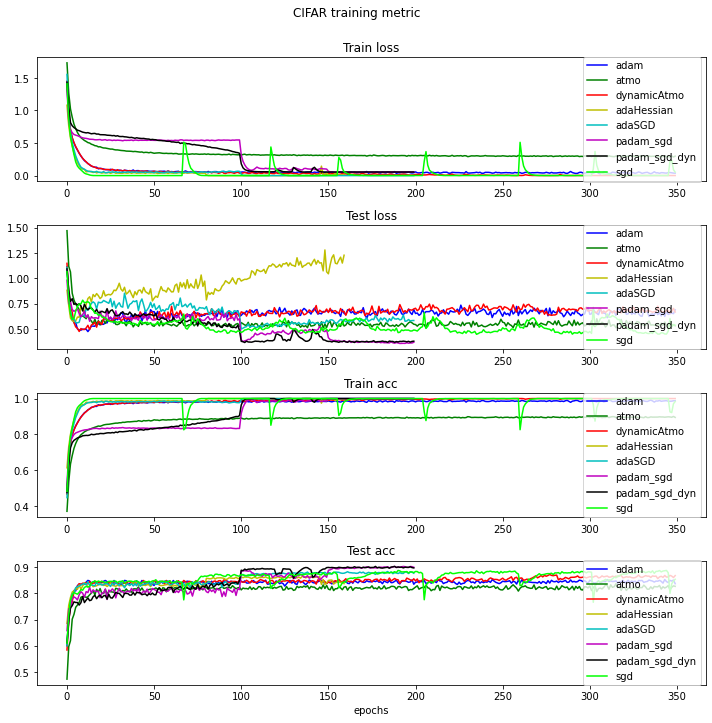

In [11]:
# CIFAR metric plot
figure, axis = plt.subplots(4, 1, figsize=(10,10))
color = ["b", "g", "r", "y", "c", "m", "k", "lime", "orange", "gray"]
time_epoch= dict()
i=0
for filename in filenames:
  if filename.find("Cifar") != -1 or filename.find("cifar") != -1:
    with open(os.path.join(TRAIN_HISTORY_DIR, filename),'rb') as file:
       history = CPU_Unpickler(file).load()
    train_loss = history["train_loss"]  
    test_loss = history["test_loss"]
    for a, loss in enumerate(train_loss):
          train_loss[a] = loss.item()
    for a, loss in enumerate(test_loss):
          test_loss[a] = loss.item()
    train_acc = history["train_acc"]
    test_acc = history["test_acc"]
    if history["optimizer"] == "dynamicAtom":
     history["optimizer"] = "dynamicAtmo" 
    axis[0].plot(train_loss, color[i], label=history["optimizer"])
    axis[1].plot(test_loss, color[i], label=history["optimizer"]) 
    axis[2].plot(train_acc, color[i], label=history["optimizer"]) 
    axis[3].plot(test_acc, color[i], label=history["optimizer"])
    time_epoch[history["optimizer"]] = history["time_epoch"]
    i = i+1
time_epoch['adaHessian'] = time_epoch['adaHessian'][-1]

axis[0].set_title("Train loss")
axis[1].set_title("Test loss") 
axis[2].set_title("Train acc") 
axis[3].set_title("Test acc")
axis[3].set_xlabel("epochs")
axis[0].legend(loc="right")
axis[1].legend(loc="right")
axis[2].legend(loc="right")
axis[3].legend(loc="right")
figure.suptitle("CIFAR training metric", y = 1.00)
figure.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'CIFAR_training'))
plt.show()


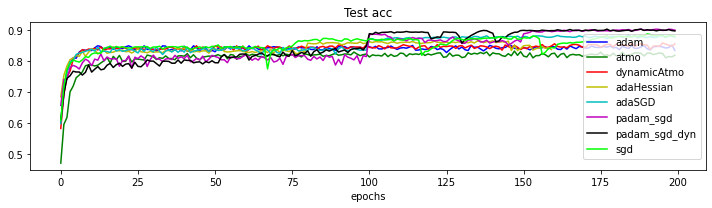

In [10]:
# CIFAR metric plot
figure, axis = plt.subplots(1, 1, figsize=(10,3))
color = ["b", "g", "r", "y", "c", "m", "k", "lime", "orange", "gray"]
time_epoch= dict()
i=0
for filename in filenames:
  if filename.find("Cifar") != -1 or filename.find("cifar") != -1:
    with open(os.path.join(TRAIN_HISTORY_DIR, filename),'rb') as file:
       history = CPU_Unpickler(file).load()
    train_loss = history["train_loss"]  
    test_loss = history["test_loss"]
    for a, loss in enumerate(train_loss):
          train_loss[a] = loss.item()
    for a, loss in enumerate(test_loss):
          test_loss[a] = loss.item()
    train_acc = history["train_acc"]
    test_acc = history["test_acc"]
    if history["optimizer"] == "dynamicAtom":
     history["optimizer"] = "dynamicAtmo" 
    #axis[0].plot(train_loss, color[i], label=history["optimizer"])
    #axis[1].plot(test_loss, color[i], label=history["optimizer"]) 
    #axis[2].plot(train_acc, color[i], label=history["optimizer"]) 
    axis.plot(test_acc[0:200], color[i], label=history["optimizer"])
    time_epoch[history["optimizer"]] = history["time_epoch"]
    i = i+1
#time_epoch['adaHessian'] = time_epoch['adaHessian'][-1]

#axis[0].set_title("Train loss")
#axis[1].set_title("Test loss") 
#axis[2].set_title("Train acc") 
axis.set_title("Test acc")
axis.set_xlabel("epochs")
#axis[0].legend(loc="right")
#axis[1].legend(loc="right")
#axis[2].legend(loc="right")
axis.legend(loc="right")
#figure.suptitle("CIFAR training metric", y = 1.00)
figure.tight_layout()
plt.savefig(os.path.join(FIGURE_DIR, 'CIFAR_training_hybrid_200'))
plt.show()


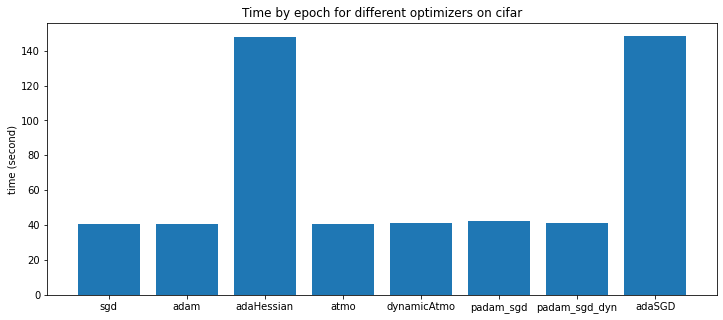

In [ ]:
# time by epoch for cifar
optimizers = []
times = []
for optimizer, time in time_epoch.items():
    optimizers.append(optimizer)
    times.append(time)
figure, axis = plt.subplots(1, 1, figsize=(12,5))
axis.bar([i for i in range(len(optimizers))], height=times, tick_label=optimizers)
axis.set_ylabel("time (second)")
axis.set_title("Time by epoch for different optimizers on cifar")
plt.savefig(os.path.join(FIGURE_DIR, 'time_epoch_cifar'))
plt.show()

In [ ]:
!git config --global user.email "arthur.nussbaumer@epfl.ch"
!git config --global user.name "anussbau"
!git add -A
!git commit -m "add plots"
!git push

[main 81e2f69] add plots
 8 files changed, 1 insertion(+), 1 deletion(-)
 create mode 100644 fig/CIFAR_training.png
 rewrite fig/CIFAR_training_first_order.png (99%)
 rewrite fig/CIFAR_training_hybrid.png (99%)
 delete mode 100644 fig/CIFAR_training_hybrid_160.png
 create mode 100644 fig/CIFAR_training_hybrid_200.png
 delete mode 100644 fig/CIFAR_training_metric_first_order.png
 delete mode 100644 fig/CIFAR_training_metric_hybrid.png
 rewrite result_visualization.ipynb (92%)
Counting objects: 8, done.
Delta compression using up to 2 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 591.93 KiB | 11.17 MiB/s, done.
Total 8 (delta 2), reused 0 (delta 0)
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/louisPoulain/OptiForML2022.git
   a9f48f0..81e2f69  main -> main
